<a href="https://colab.research.google.com/github/ayuko66/akiya-lens/blob/main/notebook/akiya_lens_%E6%AE%8B%E5%B7%AE%E5%AD%A6%E7%BF%92_%E8%B2%A1%E5%8B%99%E6%83%85%E5%A0%B1%E9%99%A4%E3%81%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize_matplotlib
import japanize_matplotlib as jmp

In [2]:
!pip install catboost
!pip install shap

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
import shap

# データ読み込み
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_projects/akiya-lens/processed/features_master__wide__v1.csv")
df.head(10)

,市区町村コード,市区町村名,都道府県名,2018_15〜64歳人口,2018_15歳未満人口,2018_65歳以上人口,2018_出生数,2018_出生率[‰],2018_年少人口率[%],2018_死亡数,...,2023_転入者数,2023_転出者数,2023_高齢化率[%],2023_年少人口率[%],2023_生産年齢人口率[%],2023_出生率[‰],2023_死亡率[‰],2023_転入率[‰],2023_転出率[‰],2023_転入超過率[‰]
0,2201,青森市,青森県,170236,32574,84764,1752.0,6.092345,11.327171,3664.0,...,6468.0,7657.0,31.965583,10.527483,57.506934,4.645600,15.358107,23.511536,27.833616,-4.322080
1,2202,弘前市,青森県,101677,18977,53396,1110.0,6.377478,10.903189,2317.0,...,4141.0,4801.0,32.762569,10.479911,56.757520,4.964390,16.473841,24.888061,28.854765,-3.966704
2,2203,八戸市,青森県,137564,27841,66956,1600.0,6.885837,11.981787,2801.0,...,5722.0,6886.0,31.398086,11.280289,57.321625,5.142458,14.984291,25.609352,30.818944,-5.209592
3,2204,黒石市,青森県,19944,3550,10551,205.0,6.021442,10.427376,492.0,...,696.0,865.0,34.211102,9.779515,56.009382,4.409695,17.326036,21.767005,27.052385,-5.285379
4,2205,五所川原市,青森県,31905,5621,18215,282.0,5.059113,10.084139,828.0,...,1227.0,1487.0,35.840708,9.246262,54.913030,3.757247,18.538297,23.401739,28.360543,-4.958804
5,2206,十和田市,青森県,35623,7086,19587,382.0,6.132015,11.374727,826.0,...,1597.0,1651.0,34.349546,10.645929,55.004525,4.692790,15.854926,26.765662,27.670700,-0.905038
6,2207,三沢市,青森県,24763,5549,9915,340.0,8.452035,13.794218,440.0,...,1836.0,1850.0,26.904811,12.763267,60.331922,6.271939,14.428040,47.387983,47.749329,-0.361346
7,2208,むつ市,青森県,34041,6608,18255,349.0,5.924895,11.218253,816.0,...,1718.0,2138.0,34.036786,10.186112,55.777103,4.111558,17.501410,31.255117,38.896065,-7.640948
8,2209,つがる市,青森県,18118,3303,11833,149.0,4.480664,9.932640,571.0,...,569.0,776.0,38.866686,9.185431,51.947883,3.476622,20.014946,18.487832,25.213634,-6.725802
9,2210,平川市,青森県,17866,3496,10286,160.0,5.046045,11.025609,455.0,...,563.0,634.0,34.577938,10.817899,54.299295,5.015571,16.882478,18.455991,20.783478,-2.327487


In [5]:
pd.set_option('display.max_rows', None)
cols = df.columns.to_list()
for col in cols:
  print(f"{col}")

市区町村コード
市区町村名
都道府県名
2018_15〜64歳人口
2018_15歳未満人口
2018_65歳以上人口
2018_出生数
2018_出生率[‰]
2018_年少人口率[%]
2018_死亡数
2018_死亡率[‰]
2018_生産年齢人口率[%]
2018_総人口
2018_転入率[‰]
2018_転入者数
2018_転入超過率[‰]
2018_転出率[‰]
2018_転出者数
2018_高齢化率[%]
スーパー件数
スーパー密度[件/km²]
2023年総人口あたりのスーパー密度
住宅地価_log中央値_2018
住宅地価_log中央値_2023
住宅地価_log差分
住宅地価_中央値_2018
住宅地価_中央値_2023
住宅地価_増減率[%]
学校件数
学校密度[件/km²]
2023年総人口あたりの学校密度
平均気温
年最深積雪
年降水量
最低気温
最高気温
標準地点数_2018
標準地点数_2023
病院件数
病院密度[件/km²]
2023年総人口あたりの病院密度
空き家_2018
空き家_2023
空き家_増加率_5年_%
空き家率_2018
空き家率_2023
空き家率_差分_5年_pt
住宅総数_2018
住宅総数_2023
過疎地域市町村
都市種別
都道府県コード
駅件数
駅密度[件/km²]
2023年総人口あたりの駅密度
住民基本台帳登載人口_2018
住民基本台帳登載人口_2023
地方税_2018
地方税_2023
地方税_変化量
地方税_変化率
地方税_ログ差分
地方交付税_2018
地方交付税_2023
地方交付税_変化量
地方交付税_変化率
地方交付税_ログ差分
民生費_2018
民生費_2023
民生費_変化量
民生費_変化率
民生費_ログ差分
教育費_2018
教育費_2023
教育費_変化量
教育費_変化率
教育費_ログ差分
土木費_2018
土木費_2023
土木費_変化量
土木費_変化率
土木費_ログ差分
人件費_2018
人件費_2023
人件費_変化量
人件費_変化率
人件費_ログ差分
公債費_2018
公債費_2023
公債費_変化量
公債費_変化率
公債費_ログ差分
扶助費_2018
扶助費_2023
扶助費_変化量
扶助費_変化率
扶助費_ログ差分
地方債現在高_2018
地方債現在高_2023


In [6]:
df_feature = df.copy()
df_feature.set_index('市区町村コード')
df_feature = df_feature[['空き家率_2018', '空き家率_2023',
                         '2018_出生率[‰]', '2018_年少人口率[%]',	'2018_死亡率[‰]', '2018_生産年齢人口率[%]', '2018_転入超過率[‰]', '2018_高齢化率[%]',
                         '2023_出生率[‰]', '2023_年少人口率[%]',	'2023_死亡率[‰]', '2023_生産年齢人口率[%]', '2023_転入超過率[‰]', '2023_高齢化率[%]',
                         'スーパー密度[件/km²]', '2023年総人口あたりのスーパー密度', '学校密度[件/km²]','2023年総人口あたりの学校密度', '病院密度[件/km²]', '2023年総人口あたりの病院密度',
                         '駅密度[件/km²]', '2023年総人口あたりの駅密度',
                         '住宅地価_log中央値_2018', '住宅地価_log中央値_2023', '平均気温', '年最深積雪', '年降水量', '最低気温', '過疎地域市町村']]

df_feature = pd.get_dummies(df_feature, columns=['過疎地域市町村'])

In [7]:
# df["住宅地価_log中央値_変化量"] = df["住宅地価_log中央値_2023"] - df["住宅地価_log中央値_2018"]


# df["Δ出生率"] = df["2023_出生率[‰]"] - df["2018_出生率[‰]"]
# df["Δ死亡率"] = df["2023_死亡率[‰]"] - df["2018_死亡率[‰]"]
# df["Δ年少人口率"] = df["2023_年少人口率[%]"] - df["2018_年少人口率[%]"]
# df["Δ高齢化率"] = df["2023_高齢化率[%]"] - df["2018_高齢化率[%]"]
# df["Δ生産年齢人口率"] = df["2023_生産年齢人口率[%]"] - df["2018_生産年齢人口率[%]"]
# df["Δ転入超過率"] = df["2023_転入超過率[‰]"] - df["2018_転入超過率[‰]"]
# df

# display(df.head())

In [8]:
from catboost import CatBoostRegressor, Pool, cv
import numpy as np

In [9]:
from catboost import CatBoostRegressor, Pool, cv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X_full) and target (y_full)
# Exclude '空き家率_2023' from features
X_full = df_feature.drop('空き家率_2023', axis=1)
y_full = df_feature['空き家率_2023']

params_full = dict(
    iterations=1000,          # 学習イテレーション数
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",     # 最適化はRMSE
    eval_metric="R2",         # 主表示をR²にする
    custom_metric=["RMSE"],   # RMSEもログに出す
    random_seed=42,
    verbose=False
)
params_full['eval_metric'] = 'RMSE' # Use RMSE as the primary evaluation metric for this model
params_full['custom_metric'] = ['RMSE', 'R2'] # Add R2 to custom_metric


# Perform cross-validation
cv_full = cv(
    Pool(X_full, y_full),   # Features and target
    params_full,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    verbose=False # Suppress verbose output during CV
)

# Extract and print the mean RMSE and R2 from the cross-validation results
rmse_full_cv = cv_full["test-RMSE-mean"].iloc[-1]
r2_full_cv = cv_full["test-R2-mean"].iloc[-1]

print(f"Full Model Cross-Validation RMSE (5-fold mean): {rmse_full_cv:.3f}")
print(f"Full Model Cross-Validation R² (5-fold mean): {r2_full_cv:.3f}")

Training on fold [0/5]

bestTest = 3.136982713
bestIteration = 322

Training on fold [1/5]

bestTest = 6.341224384
bestIteration = 351

Training on fold [2/5]

bestTest = 3.543103631
bestIteration = 402

Training on fold [3/5]

bestTest = 2.672936314
bestIteration = 463

Training on fold [4/5]

bestTest = 4.042331849
bestIteration = 253

Full Model Cross-Validation RMSE (5-fold mean): 3.968
Full Model Cross-Validation R² (5-fold mean): 0.642


In [13]:
# cvで出したパラメータを使ってモデルを作成
from catboost import CatBoostRegressor, Pool

final_inference_model = CatBoostRegressor(**params_full)
final_inference_model.fit(X_full, y_full, verbose=False) # Train without verbose output


Final inference model trained and ready.


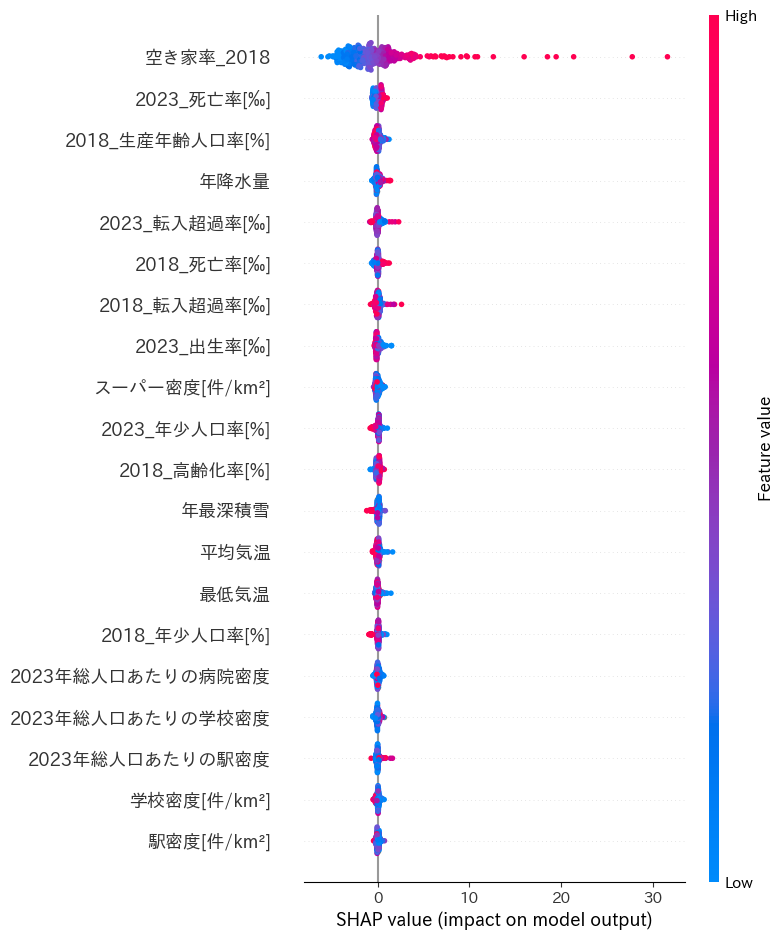

In [16]:
# SHAP値の計算 (フルモデル)
# SHAP explainer for the full model
explainer_full = shap.Explainer(final_inference_model)

# SHAP values for the full model predictions
shap_values_full = explainer_full(X_full)

# 可視化 (特徴重要度)
shap.summary_plot(shap_values_full, X_full)

## 残差をCatboost解析

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1) 2018/2023 の空き家率が入ってる行だけに絞る（欠損落とし）
cols_needed = ["空き家率_2018", "空き家率_2023"]
df_bl = df.dropna(subset=cols_needed).copy()

# 2) 単回帰ベースライン: 2023 ~ 2018
X_base = df_bl[["空き家率_2018"]].values
y_base = df_bl["空き家率_2023"].values

lr = LinearRegression()
lr.fit(X_base, y_base)

print(f"回帰式: 2023空き家率 ≈ {lr.coef_[0]:.4f} * 2018空き家率 + {lr.intercept_:.4f}")
print(f"R²(単回帰): {lr.score(X_base, y_base):.3f}")

# 3) 残差の算出 (residual: 単回帰モデルでは説明できない空き家率の変化分)
df_bl["baseline_pred"] = lr.predict(X_base) #予測値
df_bl["residual"] = df_bl["空き家率_2023"] - df_bl["baseline_pred"] # 残差

回帰式: 2023空き家率 ≈ 0.9955 * 2018空き家率 + 0.9098
R²(単回帰): 0.851


In [18]:
from catboost import CatBoostRegressor, Pool, cv
import numpy as np

# さっき整理した総合モデルの特徴量セットを再利用
# Use df_feature which has one-hot encoded '過疎地域市町村'
# Filter df_feature to match the rows in df_bl
X_total = df_feature.loc[df_bl.index, [
                         '2018_出生率[‰]', '2018_年少人口率[%]',        '2018_死亡率[‰]', '2018_生産年齢人口率[%]', '2018_転入超過率[‰]', '2018_高齢化率[%]',
                         '2023_出生率[‰]', '2023_年少人口率[%]',        '2023_死亡率[‰]', '2023_生産年齢人口率[%]', '2023_転入超過率[‰]', '2023_高齢化率[%]',
                         'スーパー密度[件/km²]', '2023年総人口あたりのスーパー密度', '学校密度[件/km²]','2023年総人口あたりの学校密度', '病院密度[件/km²]', '2023年総人口あたりの病院密度',
                         '駅密度[件/km²]', '2023年総人口あたりの駅密度',
                         '住宅地価_log中央値_2018', '住宅地価_log中央値_2023', '平均気温', '年最深積雪', '年降水量', '最低気温',
                         '過疎地域市町村_A', '過疎地域市町村_B', '過疎地域市町村_C' # Use one-hot encoded columns
                         ]]

# 残差を目的変数としてCatBoost
y_resid = df_bl["residual"]


params = dict(
    iterations=1000,          # 学習イテレーション数
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",     # 最適化はRMSE
    eval_metric="R2",         # 主表示をR²にする
    custom_metric=["RMSE"],   # RMSEもログに出す
    random_seed=42,
    verbose=False
)

# 交差検証
cv_resid = cv(
    Pool(X_total, y_resid),   # 特徴量とターゲット
    params,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42
)

print(cv_resid.columns)   # 出力されるカラムを確認

Training on fold [0/5]

bestTest = 0.1867078135
bestIteration = 999

Training on fold [1/5]

bestTest = 0.1971416173
bestIteration = 46

Training on fold [2/5]

bestTest = 0.1823286289
bestIteration = 44

Training on fold [3/5]

bestTest = -0.008827381323
bestIteration = 16

Training on fold [4/5]

bestTest = 0.02081550989
bestIteration = 15

Index(['iterations', 'test-R2-mean', 'test-R2-std', 'train-R2-mean',
       'train-R2-std', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean',
       'train-RMSE-std'],
      dtype='object')


In [21]:
r2 = cv_resid["test-R2-mean"].iloc[-1]
rmse = cv_resid["test-RMSE-mean"].iloc[-1]  # すでに√済みなのでそのままRMSE

print(f"残差モデル R² (5-fold mean): {r2:.3f}")
print(f"残差モデル RMSE (5-fold mean): {rmse:.3f}")

残差モデル R² (5-fold mean): 0.028
残差モデル RMSE (5-fold mean): 2.490


### 残差のSHAP値を可視化

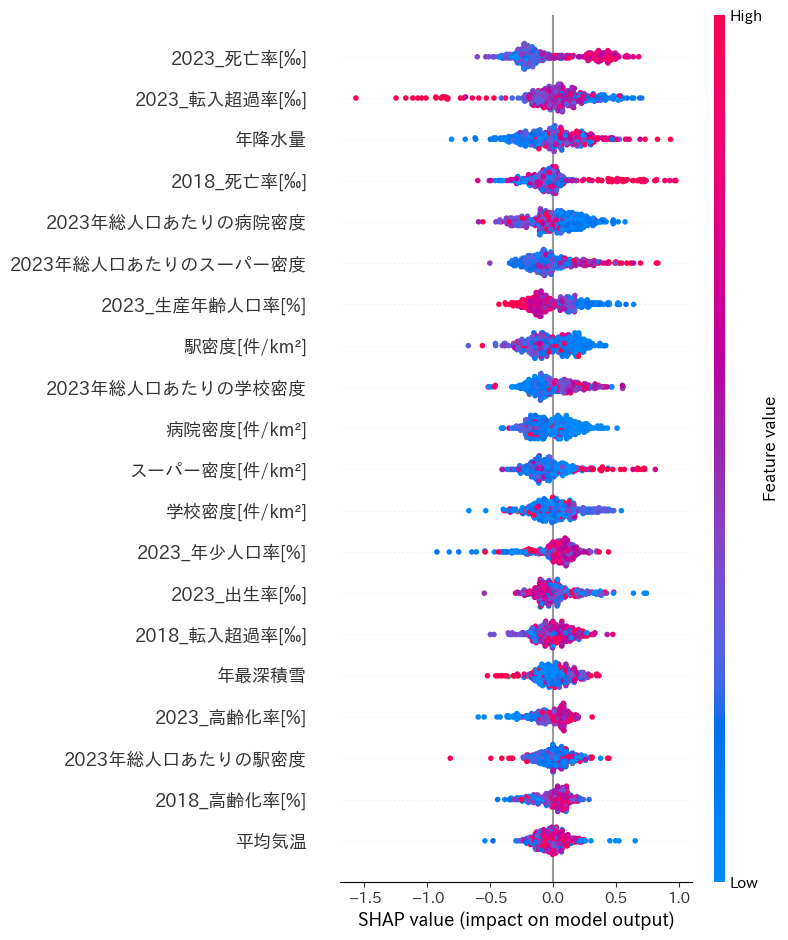

In [22]:
# 残差のSHAP値の計算

# Train a CatBoost model on the full data for SHAP explanation
model_for_shap = CatBoostRegressor(**params)
model_for_shap.fit(X_total, y_resid)

# SHAP explainer
explainer = shap.Explainer(model_for_shap)

# SHAP values
shap_values = explainer(X_total)

# 可視化
shap.summary_plot(shap_values, X_total)

In [23]:
# Calculate mean absolute SHAP values
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a pandas Series for easy sorting
feature_importance = pd.Series(mean_abs_shap_values, index=X_total.columns)

# Sort features by importance in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Print the sorted feature importance
print("Feature Importance (Mean Absolute SHAP Value):")
display(sorted_feature_importance)

Feature Importance (Mean Absolute SHAP Value):


,0
2023_死亡率[‰],0.255540
2023_転入超過率[‰],0.193179
年降水量,0.185874
2018_死亡率[‰],0.158318
2023年総人口あたりの病院密度,0.155816
2023年総人口あたりのスーパー密度,0.151466
2023_生産年齢人口率[%],0.150244
駅密度[件/km²],0.147505
2023年総人口あたりの学校密度,0.135362
病院密度[件/km²],0.131635


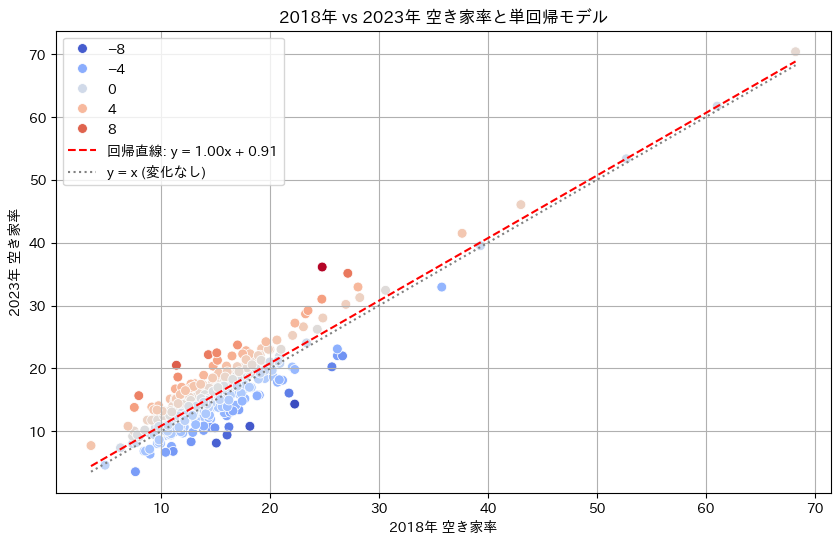

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 散布図の作成
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_bl, x="空き家率_2018", y="空き家率_2023", hue="residual", palette="coolwarm", s=50)

# 回帰直線の描画
x_range = np.array([df_bl["空き家率_2018"].min(), df_bl["空き家率_2018"].max()])
y_pred_range = lr.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred_range, color='red', linestyle='--', label=f'回帰直線: y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}')

# 1:1の線の描画
plt.plot(x_range, x_range, color='gray', linestyle=':', label='y = x (変化なし)')


plt.title('2018年 vs 2023年 空き家率と単回帰モデル')
plt.xlabel('2018年 空き家率')
plt.ylabel('2023年 空き家率')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 残差の上位5地域
print("残差 上位5地域:")
display(df_bl.nlargest(5, 'residual')[['市区町村名', '空き家率_2018', '空き家率_2023', 'baseline_pred', 'residual']])

# 残差の下位5地域
print("\n残差 下位5地域:")
display(df_bl.nsmallest(5, 'residual')[['市区町村名', '空き家率_2018', '空き家率_2023', 'baseline_pred', 'residual']])

残差 上位5地域:


,市区町村名,空き家率_2018,空き家率_2023,baseline_pred,residual
25,八幡平市,24.7961,36.14,25.593873,10.546127
109,会津美里町,11.4168,20.52,12.275024,8.244976
381,尾鷲市,27.1466,35.14,27.933753,7.206247
15,宮古市,14.3475,22.20,15.192483,7.007517
94,庄内町,7.9646,15.68,8.838422,6.841578



残差 下位5地域:


,市区町村名,空き家率_2018,空き家率_2023,baseline_pred,residual
22,陸前高田市,22.2727,14.34,23.081874,-8.741874
406,日野町,18.1624,10.81,18.990146,-8.180146
128,つくば市,15.0801,8.14,15.921772,-7.781772
300,南箕輪村,16.0665,9.42,16.903716,-7.483716
275,富士河口湖町,21.7492,16.09,22.560740,-6.470740


### 残差要因の可視化
各自治体の視覚化結果が何を示しているかを簡単に説明し、
残差上位5下位5地域の正または負の残差に寄与する要因可視化

In [26]:
# 残余スコアに基づいて上位 5 位と下位 5 位の自治体の指数を取得
top_residual_indices = df_bl.nlargest(5, 'residual').index
bottom_residual_indices = df_bl.nsmallest(5, 'residual').index

In [27]:
# 上位残余自治体と下位残余自治体の指数を結合
combined_indices = top_residual_indices.union(bottom_residual_indices)
display(combined_indices)

Index([15, 22, 25, 94, 109, 128, 275, 300, 381, 406], dtype='int64')

In [30]:
top_n = 5
top_shap_info = {}

for original_index in combined_indices:
    info = {}
    try:
        # Find the corresponding index in X_total (which has the same index as df_bl)
        xtotal_index = X_total.index.get_loc(original_index)

        # Select SHAP values for the current index
        info['shap_values'] = shap_values.values[xtotal_index]
        # Select feature values for the current index
        info['feature_values'] = shap_values.data[xtotal_index]
        # Get the base value (assuming a single base value for residuals)
        # Use the base value from the shap_values object
        info['base_value'] = shap_values.base_values[xtotal_index]

        # Store feature names
        info['features'] = X_total.columns.tolist()

        # Sort features and SHAP values by absolute SHAP value for displaying top_n
        sorted_indices = np.argsort(np.abs(info['shap_values']))[::-1]
        info['features'] = [info['features'][j] for j in sorted_indices[:top_n]]
        info['shap_values'] = info['shap_values'][sorted_indices[:top_n]]
        info['feature_values'] = info['feature_values'][sorted_indices[:top_n]]

        top_shap_info[original_index] = info

    except KeyError:
        # Handle cases where the original index is not found in df_bl/X_total
        print(f"Warning: Original index {original_index} not found in the data used for SHAP analysis.")
        pass


# You can inspect the top_shap_info dictionary if needed
print(top_shap_info)

{15: {'shap_values': array([0.70333043, 0.67402738, 0.52259683, 0.49186885, 0.4310255 ]), 'feature_values': array([-8.462881032593256, 16.82084233460736, 16.66, 19.92937451800138,
       51.60530908795714], dtype=object), 'base_value': np.float64(-0.0002576781473700687), 'features': ['2023_転入超過率[‰]', '2018_死亡率[‰]', '平均気温', '2023_死亡率[‰]', '2023_生産年齢人口率[%]']}, 22: {'shap_values': array([-0.82619604, -0.81793096, -0.69732488, -0.67498495, -0.62086503]), 'feature_values': array([8.594176027920165, 0.0008179736067182, -0.0545315737812153,
       0.033116, 1420.9], dtype=object), 'base_value': np.float64(-0.0002576781473700687), 'features': ['2023_年少人口率[%]', '2023年総人口あたりの駅密度', '2023_転入超過率[‰]', '駅密度[件/km²]', '年降水量']}, 25: {'shap_values': array([0.9630721 , 0.74010444, 0.67878025, 0.65125799, 0.54149047]), 'feature_values': array([16.24377068512953, 2.305760283279121, 18.857825173961377, 16.79,
       0.00116], dtype=object), 'base_value': np.float64(-0.0002576781473700687), 'features': ['2018

#### 選択した自治体を反復処理し、それぞれについて SHAP 棒グラフを作成して、残差への特徴の寄与を視覚化


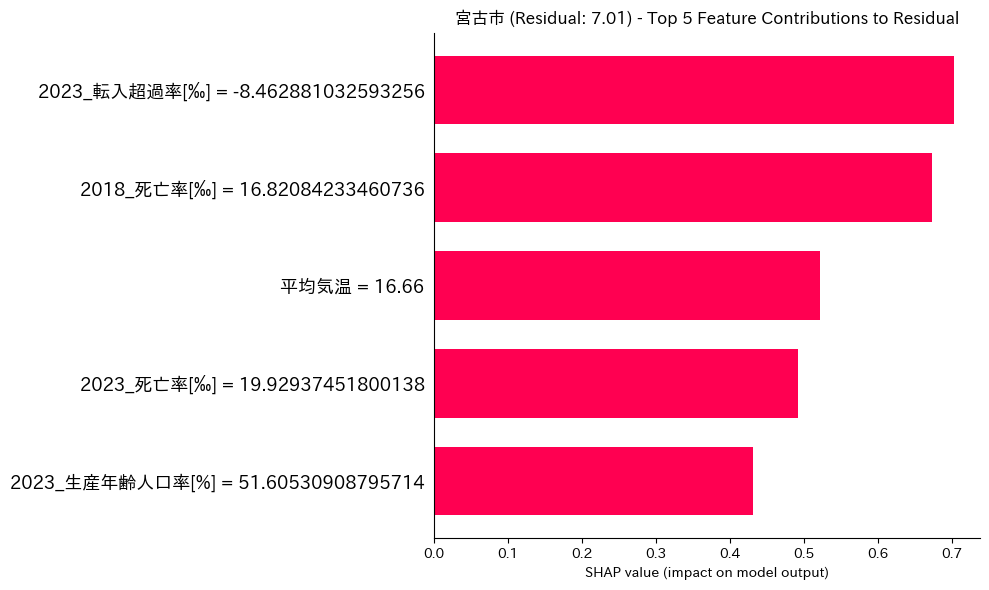

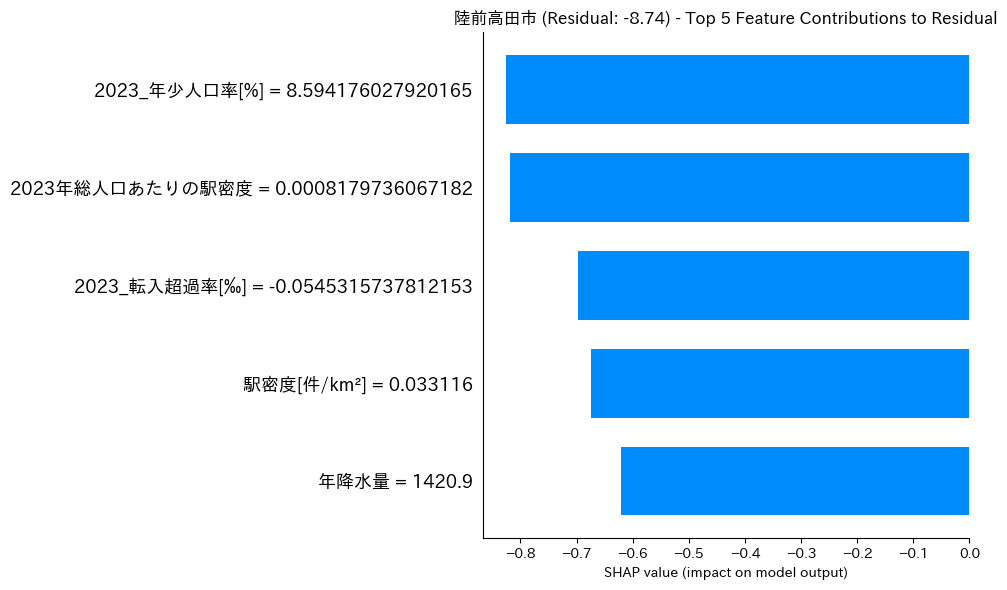

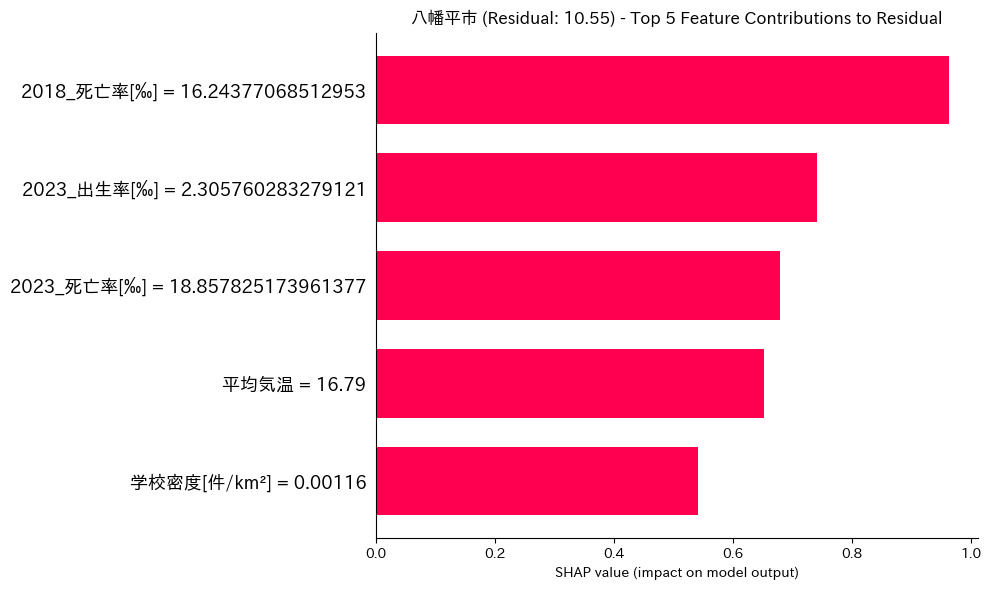

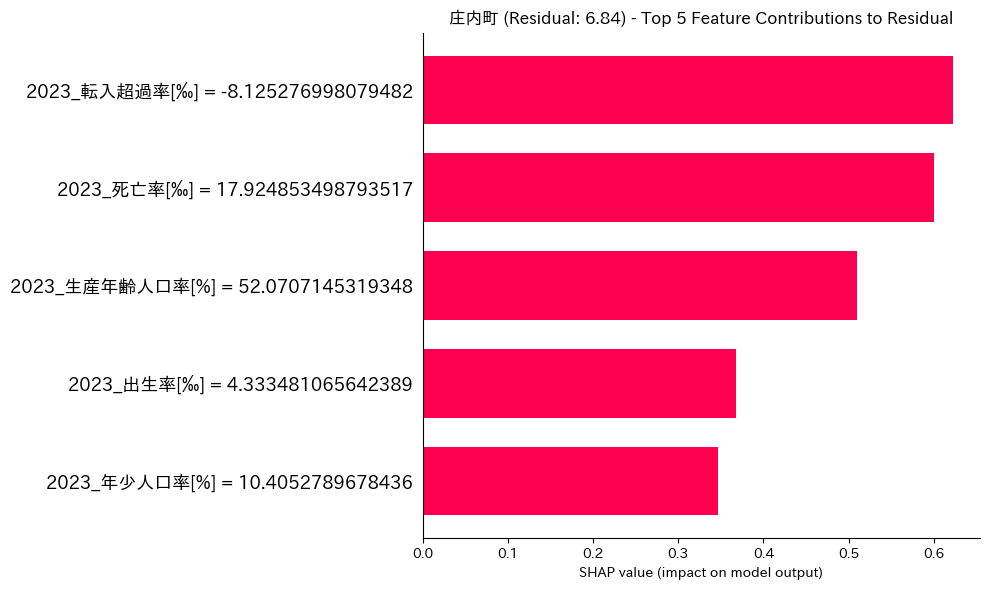

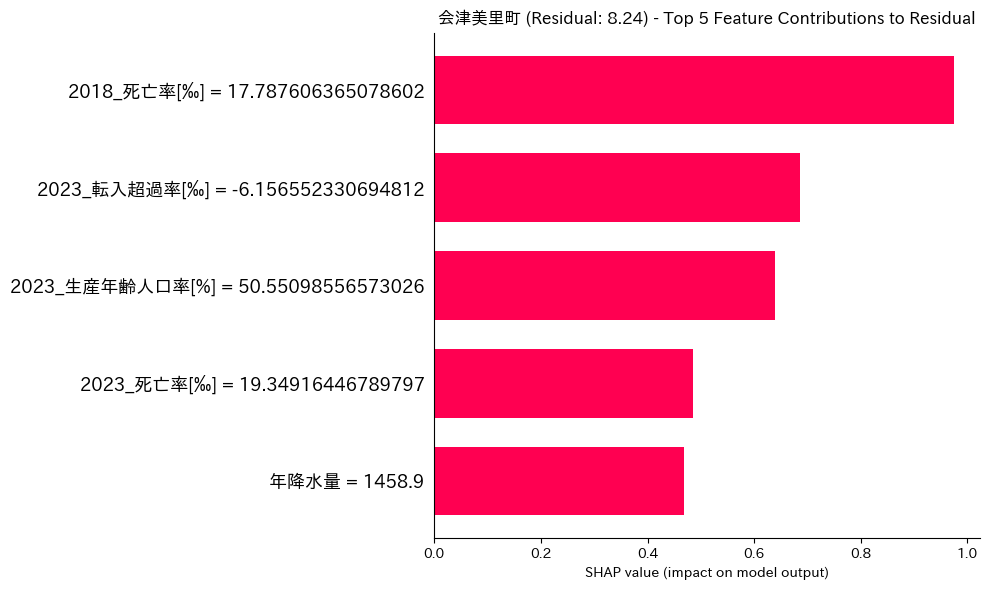

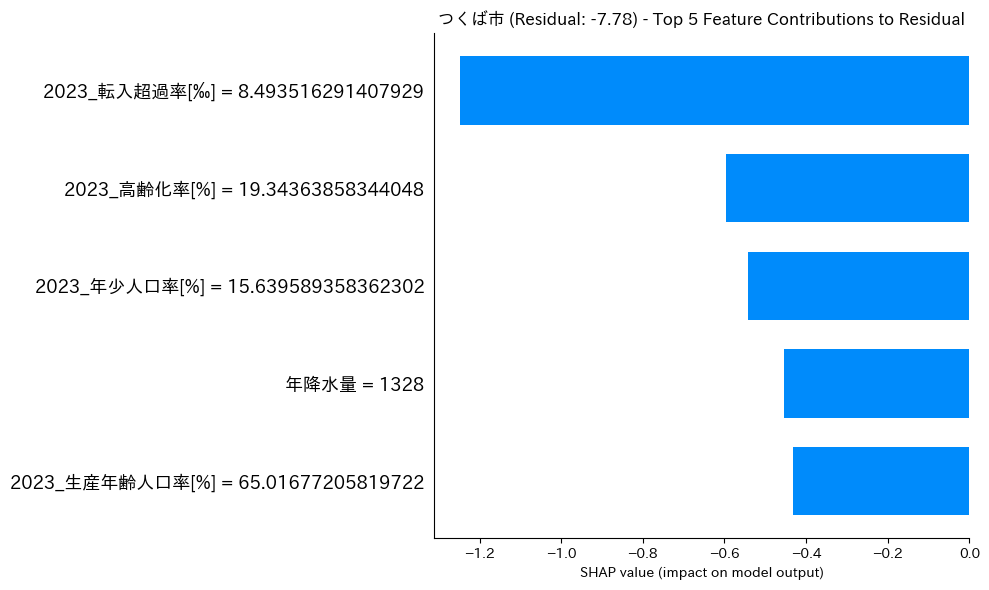

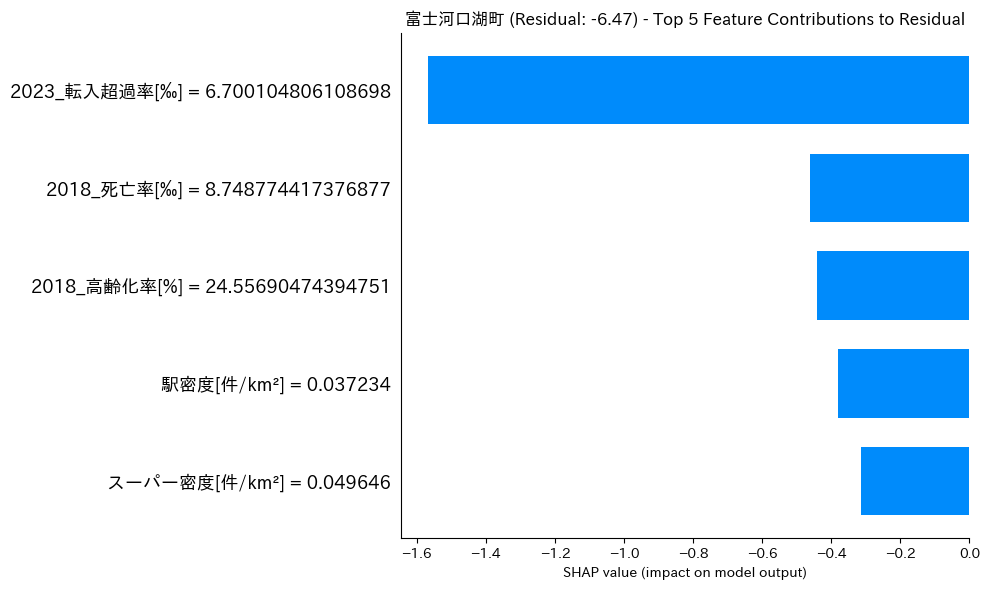

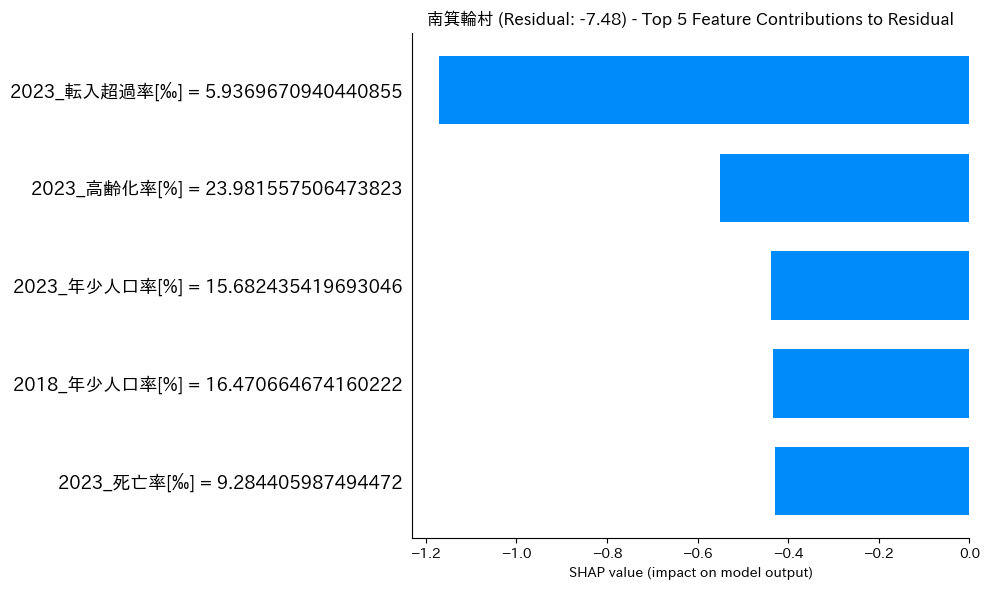

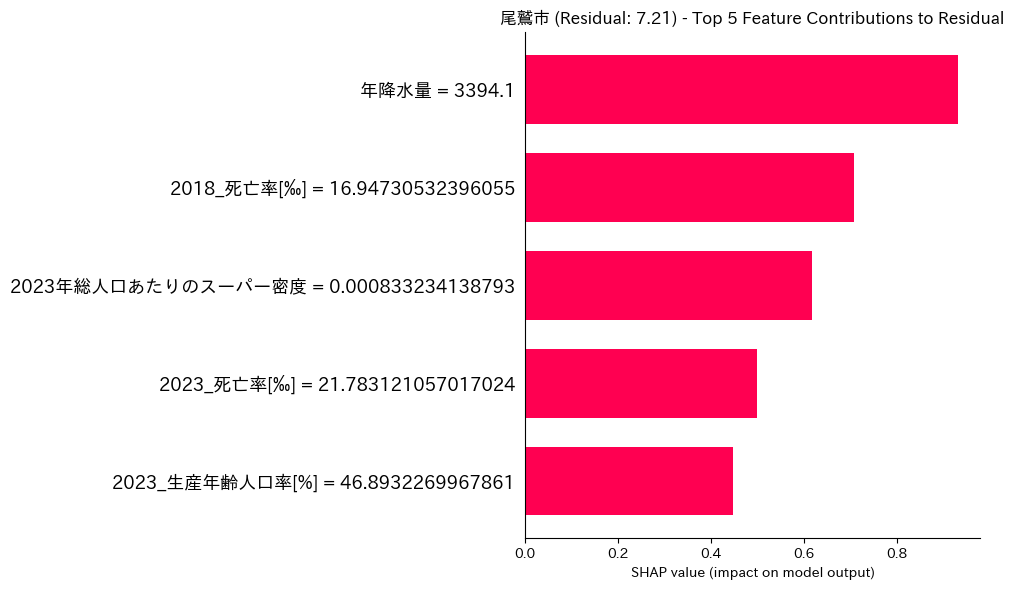

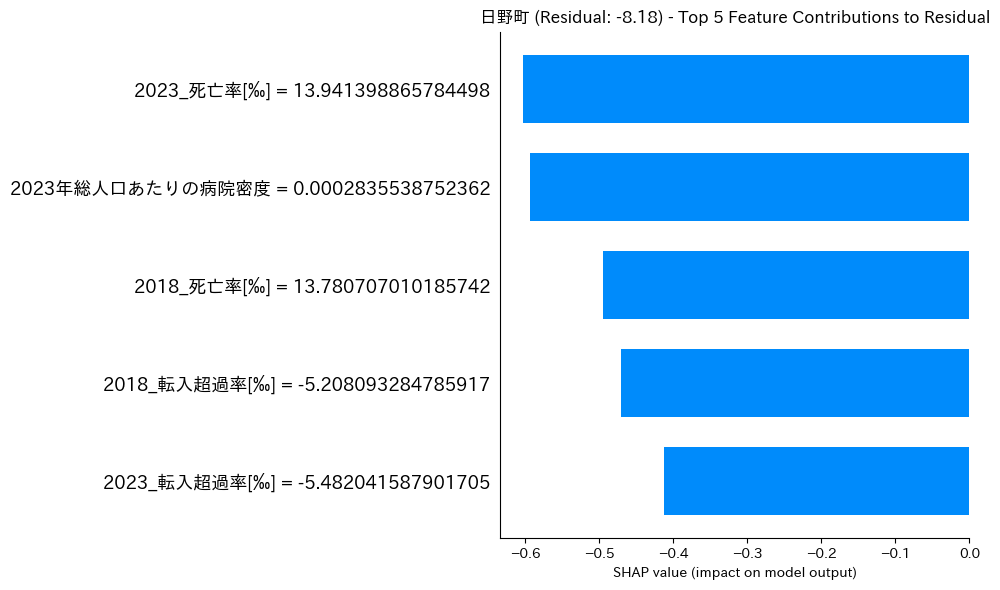

In [31]:
import matplotlib.pyplot as plt

for index, info in top_shap_info.items():
    # Extract information
    shap_values_subset = info['shap_values']
    feature_values_subset = info['feature_values']
    features_subset = info['features']
    base_value = info['base_value']

    # Get municipality name and residual for the title
    municipality_name = df_bl.loc[index, '市区町村名']
    residual_value = df_bl.loc[index, 'residual']

    # Create SHAP bar plot
    plt.figure(figsize=(10, 6))
    shap.bar_plot(shap_values_subset, feature_values_subset, features_subset, show=False)

    # # Add title
    plt.title(f'{municipality_name} (Residual: {residual_value:.2f}) - Top 5 Feature Contributions to Residual')
    plt.tight_layout()
    plt.show()